**CP2410 Assignment 2 By Ryan Honorica**

*Introduction*

This Assignment takes the data from the Travelling Santa 2018 competition of that year at https://www.kaggle.com/c/traveling-santa-2018-prime-paths and uses multiple algorithms to process that data into usable information. These algorithms utilise the full data set to arrive at the solutions produced in there respective results, rather than a percentage amount of them. This assignment uses the kernel https://www.kaggle.com/seshadrikolluri/understanding-the-problem-and-some-sample-paths to analyse the users suggested solutions complexity, efficeincy, its running time and how this effects the overall calculated outcome of the solution arrived at in this kernel. The algorithms created in this kernel are manipulated to intake specific Data Structures, as such to observe the efficiency of these Algorithms when they process the specific Data Structures of Dict (Hash Tables) and Graph Data Structures (Hash Table Abstraction).The altered Algorithms are as follows: 
* total_distance  
* distance_of_graph_path. 

Both originate from the total_distance algorithm within the original kernel. 

The Running Time of an Algorithim can be represented in Big Oh notation, a notation that generally takes the form of:

$$O(n)= Running Time Function(n)$$

Which is usually a measure of how long in relation to the n-elements of the input variable there are in the algorithm in question. Running time can be observed for each data type in Python at this URL: https://wiki.python.org/moin/TimeComplexityThis. 
This is especially useful for at-a-glance decision making for what algorithms to use to improve utility within a program. In regards to the parent kernel of this question, the Running time of these two algorithms could generally dictate the speed at which a solution is found for the user, as well as its effectiveness. We will also be comparing the usefulness of the Two Data structures involved in both Algorithms and observe which is more appropriate given the overal goal of calculating the final distance travelled by the input path variable. These input path variables take on different data structures and how these are processed changes the Running Time of Each algorithm. 

It should be noted that the base Data Structure for the input (..input/cities.csv) is a kind of DataFrame from the Pandas module. These can generally be made from either Lists or Dictionaries (https://www.geeksforgeeks.org/python-pandas-dataframe/). Here we will be primarily working with the data structure Dict. A Dictionary is the base form of a Hash map Data Structure, wherein a value or set of values is assigned to an index/key. This holds true for the code below: 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df_cities = pd.read_csv('../input/cities.csv')
df_cities.head()
cities = dict(pd.read_csv('../input/cities.csv', index_col=['CityId']))
print(type(cities))


<class 'dict'>


This code shows that the input data structure is a dictionary. Although it should be noted that when transformed into a dictionary we discover that there are actually two dictionaries in this Data Structure known as DataFrame. Specifically, we observe a Dict for the X column and a Dict for the Y column. So from here on in we can assume that when a (df_cities).X call is made we are specifically referencing the X coordinate dictionary. 

**Algorithim 1**

*total_distance*



In [2]:


def total_distance(dfcity,path):
    prev_city = path[0]
    dict_X = dict(dfcity.X)
    dict_Y = dict(dfcity.Y)
    total_distance = 0
    step_num = 1
    for city_num in path[1:]:
        next_city = city_num
        total_distance = total_distance + np.sqrt(pow((dict_X.get(next_city)-dict_X.get(prev_city)),2) + pow((dict_Y.get(next_city)-dict_Y.get(prev_city)),2)*\
                                 (1+ 0.1*((step_num % 10 == 0)*int(not(prime_cities[prev_city])))))
        prev_city = next_city
        step_num = step_num + 1
    return total_distance



**Algorithim 1**

*Analysis*


The Algorithim total_distance takes in a normal List of indexes called path, as well as the DataFrame dfcity. The general purpose of this algorithim is to take the hash table values of each of the X and Y coordinates for their specific index defined by the path variable, measure between the current cities and the previous cities coordinates, then have this value added to the overall distance travelled by the path. This can also generally be viewed as a kind of graphing algorithim as it essentially calculates the edges value of the specific vertices defined by the path variable. This is what occurs in the second data structure of Graphs() and its respective algorithm. This will be analysed in the Algorithm 2 section. 

We can analyse the general running time of this algorithim (total_distance) fairly simply, as it is essentially various kinds of simple calculations and primitive operations. The point of interest here is how the algorithim interacts with the Hash Table (Dict) Data Type and how the operations involved with this interaction change the running time overall of this specific algorithim. 

To begin with, we observe there are a number of primitive operations within and outside of the for loop in the main part of the algorithim.  We see at the begin there is the primitive call and assign line of:

prev_city = path[0] 



since this simply calls a single integer value and runs only to the start of the input (first value of the list) and assigns it to the value prev_city, we can say this operation has two primitive actions therefore the running time for it is:

$$O(n) = 1+1 = 2$$



We then analyse the next line:

    dict_X = dict(dfcity.X)
    
    dict_Y = dict(dfcity.Y)
We see that it is both a call from the dfcity DataFrame, the casting of the Dict class and the copying of the whole dictionary to dict_X and dict_Y. When anaylsing this, we see 3 primitive operations for each line. The copying of a whole dictionary takes the general Running Time of \\(O(n) = n\\). As such the Running Time of this line can be seen as:

$$O(n) = 2n + 6 $$

Analysing the next two lines:

    total_distance = 0
    
    step_num = 1
    
These are simply assignments to variable names, meaning the running time for these can be viewed as such:
$$O(n) = 1$$
$$O(n) = 1$$

Combining these all together means the exterior operation running time is as follows:

$$O(n) = 1+1+2 + 2n+6 = 2n + 10 $$


Observing the for loop, there is a lot to unpack in regards to how this function works and what it is calling each line. So we will go line by line. 

Observing the for loop conditions:

for city_num in path[1:]:

we observe that the running time is generally n for this for loop condition as it runs for the length of n, the length of the path variable which would take n running time to pass through everything in it. However, all the operations within the function will determine the overall running time. At its base form, we can observe the following:

$$O(n) = n$$



When considering the internal running time, we must then observe the following line after the for loop condition. 

next_city = city_num

This is simply an assign to one variable to the value of another. the variable next_city is assigned the value city_num. The call of city_num is a simple call directly from the for loop condition, and the assign is also a simple assignment operation. As such we can observe the running time of this line to be:

$$O(n) = 2$$

The next line is as follows:

 total_distance = total_distance+\ np.sqrt(pow((dict_X.get(next_city)-dict_X.get(prev_city)),2) + pow((dict_Y.get(next_city)-dict_Y.get(prev_city)),2)*\
                                 (1+ 0.1*((step_num % 10 == 0)*int(not(prime_cities[prev_city])))))

This line has a number of operations involved with it, and is rather complex when observed as a whole. It becomes simpler however when observed as individual components. 

We first find there is a simple call of the variable total_distance and it is assigned to the variable total_distance. At this point, we observe the running time as:

$$ O(n) = 2$$

However, we see that there is further calculations on this line, denoted by the operator \ which in python code indicates the a line continuation. With this in mind we must process the whole thing as a single line. We observe that there is generally an operation performed on the remaining terms of this line, the np.sqrt() function, which can generally be seen as a primitive action, not particularly calling any variables within the function but simply operating on its outcome and as such the running time becomes:

$$ O(n) = 2+1=3$$

the next few operations is where the complexity emerges. In each componenent of this we call the .get method on each of the dictionaries and call for the specific values associated with the value for this dict. This .get() scans the entire dictionary until it finds the value associated with its particular key. As seen in the TimeComplexity page, we see that analysing the whole dict will result in worst case and best case runnning time of :

$$O(n) = n$$ 

This is viewed as worst case scenario if the Hash Map is poorly constructed and there are a large number of collisions expected. Since the Dict's are constructed already from the csv file and each index only has one value, there is presumably no collisions involved with it. With no collisions we can presume the Running time for each operation is:

$$O(n) = 1 $$

In Algorithim analysis we usually only observe the worst-case scenario, as this is most realistic running time for a generalised use case for an algorithim. Since this overall happens 4 times within this calculation, we observe the general Running Time for this as :

$$O(n) = 4n $$

What follows is multiple simple operations involving a subtraction of the next_city X and prev_city X, with a similar operation occuring on the Y values. This results in the running time of :

$$O(n) = (2n+2)+(2n+2) = 4n+4$$

in regards to this, we also observe the simple operations of power function on each of the returned values from the call functions on the dictionaries, as in the running time becomes :

$$O(n) = 4n +  6 $$

With this in mind we also consider the square root componenent of this algorithim which is a simple operation performed on all of the called variable values. As in the running time:

$$O(n) = 4n + 7 $$

After this we observe the line:

(1+ 0.1*((step_num % 10 == 0)*int(not(prime_cities[prev_city]))))

These are simply primitive operations that result in boolen statements. It should be noted here that there is a reference in this line to the list array called prime_cities which is a seperate algorithim which uses a Data Structure that will not be required to analyse. Needless to say though, calling a List value is a simple operation that only requires the running time:

$$O(n) = 1$$
To run.

This operation is only multiplied if there are 2 real values, however, since we are considering worst case scenario, we should assume both operations are occuring, and as such the general running time for this operation should be view as:

$$O(n) = 3$$ 

And since this operation is also occuring on the same line, we can observe the general Running Time of this overall line is as follows:

$$O(n) = 4n + 10 $$





Now considering the Running Time of the following lines in the sequence, They are simply re-assignments of variables to allow for the procedure of the next few.  However, they are calls to a specific variable, meaning they result in to simple operations, a call and then an assign.  Specifically this is the running time for the following line:

        prev_city = next_city
        
$$O(n)= 2$$
While the other line has a slightly different running time as it has a call/assign but also has an addition operation as well:

step_num = step_num + 1
        
$$O(n) = 3$$
With this in mind we fundamentally get a running time within this loop:

$$O(n) = 4n+15$$


This running time equation occurs within the running time equation of the for loop, as such, we can observe the overall running time equation as:
 $$O(n) = (4n+15)n + 2n+10 = 4n^2 + 17n +10 $$

We can observe the final Running Time to be the above Running Time Function. This would imply that this function is running in generally\\(O(n) = n^2\\) time. The influence of the \\(O(n) = 17n\\) component of the running time equation can be generally considered to be the calling and assigning aspect of the algorithim. We can more or less omit the constant value of 10 when considering the overall running time of the algorithim considering it never changes.

With this in mind, with a generalised running time of:

$$O(n) = 4n^2$$ We can plot the general expected running time and compare it to the actual expected running time of the algorithm. 


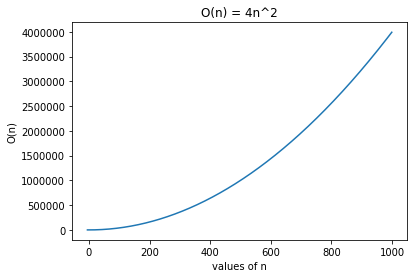

In [3]:
#https://matplotlib.org/users/pyplot_tutorial.html
import numpy as np
import matplotlib.pyplot as plt

#http://courses.csail.mit.edu/6.867/wiki/images/3/3f/Plot-python.pdf
n = np.arange(-5, 1000, 1)
On = (4*(n**2))
plt.plot(n, On) # Create line plot with yvals against xvals
plt.title('O(n) = 4n^2')
plt.ylabel('O(n)')
plt.xlabel('values of n')
plt.show()

When deriving the equation we see the generally expected running time of total_distance should be exponential and increases as such as the time value of n increases. This would be generally expected as if the path value or the dfcity value increases then the amount of time to process it would be exponential as well. Since there are two inputs there is also the general expectation that the algorithim would run through both of them and as such we would expect a running time of generally:
$$O(n) = n^2 $$

Observing the reality of this requires a portion of the input and a defined path of a varying length to observe the actual running time. The code below increments both. 

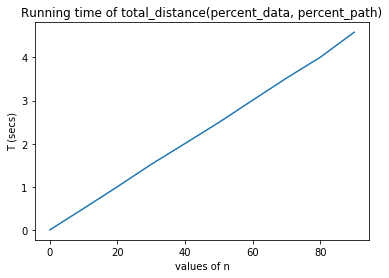

In [4]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import time
import matplotlib.pyplot as plt
df_cities = pd.read_csv('../input/cities.csv')
df_cities.head()


def total_distance(dfcity,path):
    prev_city = path[0]
    dict_X = dict(dfcity.X)
    dict_Y = dict(dfcity.Y)
    total_distance = 0
    step_num = 1
    for city_num in path[1:]:
        next_city = city_num
        total_distance = total_distance+ np.sqrt(pow((dict_X.get(next_city)-dict_X.get(prev_city)),2) + pow((dict_Y.get(next_city)-dict_Y.get(prev_city)),2)*\
                                 (1+ 0.1*((step_num % 10 == 0)*int(not(prime_cities[prev_city])))))
        prev_city = next_city
        step_num = step_num + 1
    return total_distance

def sieve_of_eratosthenes(n):
    primes = [True for i in range(n+1)] # Start assuming all numbers are primes
    primes[0] = False # 0 is not a prime
    primes[1] = False # 1 is not a prime
    for i in range(2,int(np.sqrt(n)) + 1):
        if primes[i]:
            k = 2
            while i*k <= n:
                primes[i*k] = False
                k += 1
    return(primes)

prime_cities = sieve_of_eratosthenes(max(df_cities.CityId))



increment = [ i for i in range(0, 100,10)]
times = []
for i in increment:
    start = time.time()
    percent_rows = int(len(df_cities)*(i/100))
    percent_data = df_cities.head(percent_rows)
    percent_path = list(percent_data.CityId[:].append(pd.Series([0])))
    total_distance(percent_data,percent_path)
    end = time.time()
    times.append(end-start)
    
    
n = increment
T = times
plt.plot(n, T) # Create line plot with yvals against xvals
plt.title('Running time of total_distance(percent_data, percent_path)')
plt.ylabel('T (secs)')
plt.xlabel('values of n')
plt.show()

The figure above seems to suggest that the running time of this algorithim is actually linear, with the increase of the length of the input DataFrame and the input List not actually effecting the overall running time of the input. This would seem to indicate that the \\(O(n) = 17n\\) is the primary effecting component of the Running Time in question, which would suggest that the fact that there are two inputs doesn't effect it either. This variation can generally be explained with the nature of the worst-case-scenario analysis and how it applies to this situation.

When considered logically, we observe that our original analysis of the algorithim was done in consideration of the worst case scenarios, wherein both the dictionaries had bad collision handling and that the component that checks the not_prime componenet of the algorithim always occurs. Not considering either of these when observing the running time of the interior of the for loop, we observe it to be:

$$O(n) = n(4*1+15) + 2n+10 = 19n+2n+10   $$

So the overall Running Time function would be considered to be :

$$O(n) = 21n+10 $$ 



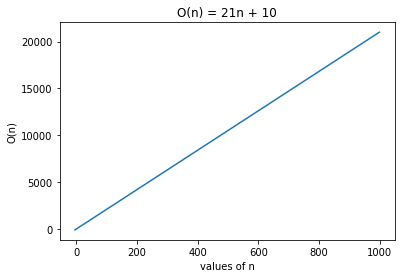

In [5]:
#https://matplotlib.org/users/pyplot_tutorial.html
import numpy as np
import matplotlib.pyplot as plt

#http://courses.csail.mit.edu/6.867/wiki/images/3/3f/Plot-python.pdf
n = np.arange(-5, 1000, 1)
On = ((21*n) + 10)
plt.plot(n, On) # Create line plot with yvals against xvals
plt.title('O(n) = 21n + 10')
plt.ylabel('O(n)')
plt.xlabel('values of n')
plt.show()

We can observe that this running time graph is quite similar to the actual running time graph of the algorithim when analysed. 

This would imply that this fundamentally runs in \\(O(n) = n\\) time. Showing generally that the linear function is therefore true to observe it for running time. However, if the Dict's were not appropriately ordered and had not handled collisions correctly, as in if they were handled with Linear Probing or Quadratic Probing, they would produce the Running Time function initially derived as the worst case scenario. Meaning there are fundamentally two Runnning Time functions:

 $$O(n) = 4n^2 + 17n +10 $$
 
 and 
$$O(n) =  21n+10 $$ 


But for our current use case of this algorithim we can safely assume that the running time for this algorithim is:
$$O(n) =  21n+10 $$ 


**Algorithim 2**

*distance_of_graph_path*

In this algorithim we use the Data Structure Graphs. Graphs are a way to represent a connection of nodes with one another. A Graph typically takes the form of (U,V) where U is the node name, usually an arbitrary container or value, while V is usually the value associated with this node. These values can usually be anything from the distance between nodes, to the nodes the current node is connected to, to anything else.

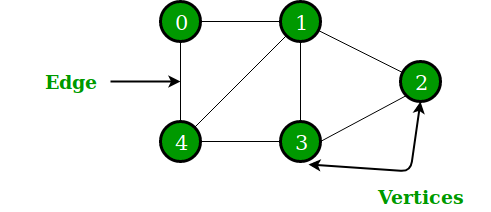
https://www.geeksforgeeks.org/graph-data-structure-and-algorithms/

In fact, we can generally view the pandas.core.DataFrame type as being a Graph Data Type implementation, wherein the CityID of the table is simply the node name and the X and Y values are simply the coordinate values, dictating the distance from the reference point. This can be observed in this  url https://www.python.org/doc/essays/graphs/. 

graph = { 0: [4, 1],
             4: [1, 3, 0],
             1: [0,4,3,2],
             3: [4,1,2],
             2: [1,3]}
             
This is how a Graph Data Structure would be implemented in Python. However, a Dictionary already operates in a similar way to this, as it has most of the required functions needed in a Graph ADT (Abstract Data Type). Such functions as .get() reflect the .element() required function of the Graph ADT. 

With this in mind, the algorithm distance_of_graph_path is a kind of Graphing Algorithm wherein the easiest path to follow is found then used to calculate the overall distance covered. 

In [6]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import time
import matplotlib.pyplot as plt
df_cities = pd.read_csv('../input/cities.csv')
df_cities.head()

cities = df_cities.CityId

cities_path = list(df_cities.CityId[:])

def sieve_of_eratosthenes(n):
    primes = [True for i in range(n+1)] # Start assuming all numbers are primes
    primes[0] = False # 0 is not a prime
    primes[1] = False # 1 is not a prime
    for i in range(2,int(np.sqrt(n)) + 1):
        if primes[i]:
            k = 2
            while i*k <= n:
                primes[i*k] = False
                k += 1
    return(primes)

prime_cities = sieve_of_eratosthenes(max(df_cities.CityId))


def graph_structure(path):
    graph = {}
    index = 0
    for city in path:
        path = list(path)
        next_index = index + 1
        prev_index = index-1
        prev_city = path[prev_index]
        if index < len(path)-1:
            next_city = path[next_index]
        else:
            next_city = path[0]
        graph[city]= (prev_city, next_city)
        index = index+1
    return graph



graph = graph_structure(cities_path)


def distance_of_graph_path(graph):
    cities = pd.read_csv("../input/cities.csv")
    dict_X= cities.X
    dict_Y = cities.Y
    distance = 0
    step_num = 1
    for city in graph:
        next_city = graph.get(city)[1]
        currentX,currentY = dict_X.get(city), dict_Y.get(city)
        nextX,nextY = dict_X.get(next_city),dict_Y.get(next_city)
        distance = distance + np.sqrt(pow((nextX - currentX),2) + pow((nextY - currentY),2)*\
                                      (1+ 0.1*((step_num % 10 == 0)*int(not(prime_cities[city])))))
        step_num = step_num + 1  
    return distance

print(distance_of_graph_path(graph))


444017696.3951985


This algorithim, takes in the Graph Data Structure and processes the edges values such that the distance between the two vertices can be calculated. In this particular algorithim, we assume that the Graph Data Structure put through the agorithim is a dictionary of linearly directed nodes, wherein we know the node that the current node was previously connected to and the node it will be connected to next in the path. This takes the node names and uses these node names as a way to get the data for the distances on the x and y axis. Another way to process the Graph Structure is to have the distance between the two nodes be represented as its value. This algorithim more or less adds all of these distances together such that the Graph doesn't need to store distance value. This algorithm is much the same as the total_distance algorithim. This analysis is to compare the efficiency between using the Graph Data Structure and the Dict data structure. 


To begin with, we must observe the primitive operations outside of the for loop.  We observe that within the algorithim it reads and assigns the DataFrame from the csv file into the variable cities. This is both a call, copy and assignment. There are 3 primitive operations at play here, so we observe the Running Time to be:

$$O(n) = 3$$ 

Observing the following lines:

    dict_X= cities.X
    
    dict_Y = cities.Y
 
These lines are similar to the total_distance algorithim, wherein in each line there is two calls and a single copy of the Dict, as well as an assignment of this to the specific Dict called dict_X or dict_Y. This set of operations has the general Running Time:

$$O(n) = 3 + n $$

And since this is done twice we observe that the running time of these two lines to be:

$$O(n) = 2n + 6 $$

Observing the next two lines:

    distance = 0
    
    step_num = 1
    
When analysing these lines, we see they're simple assignment primitive operations and as such the Running Time of the outside lines are :

$$O(n) = 2n + 8 $$

Analysing the next line we see the for loop condition:

for city in graph:

This line goes through the entirety of the length of the graph, as in, the Running Time loops for :

$$O(n) = n$$ 

However, we must now accomodate for the interior aspects of the loop. Observing the following line, we see:
next_city = graph.get(city)[1]

Which is both a call for input of the dict called graph, as well as a search of the whole dictionary for the index in question. This is also a call on the resulting tuple, as in the indexing of [1] to get the second element in the input tuple. This is then assigned to the variable next_city. 

with this in mind we observe this lines running time to be:

$$O(n) = n+2$$

The next two lines are similar to the current line:



currentX,currentY = dict_X.get(city), dict_Y.get(city)


nextX,nextY = dict_X.get(next_city),dict_Y.get(next_city)

each of these essentially have the same running time of the previous line, but are done twice per line as there is the same operation assigned to two variables. With this in mind, we observe that the Running Time for these two lines to be:

$$O(n) = 2n+4$$ 
and as such the last few lines in the loop can be observed to have the Running time:
$$O(n) = 3n+ 6$$ 

The next line is similar to the previous algorithm total_distance wherein the general distance between the current node and the next node in the graph path is calculated:

 distance = distance + np.sqrt(pow((nextX - currentX),2) + pow((nextY - currentY),2)*\
                                      (1+ 0.1*((step_num % 10 == 0)*int(not(prime_cities[city])))))

We observe it to be multiple primitive operations, the call of distance, the sqrt function, the pow function called twice, the call of nextX and current X and the same operation done for the Y coordinates, as well as the multiplication of both of these values by next section of the line. At this point we can call the Running Time of this shorter section of the line to be:

$$O(n) = 7$$

The next section of the line being:

(1+ 0.1*((step_num % 10 == 0)*int(not(prime_cities[city])))))

which has an addition operation, multiplication, a call of step_num and modulus test to see if it is true, multiplied by a casted int value of the values of prime_cities[city]. Which calls most of this list but since it is a simple list and we are only calling it for one index, we observe the running time of it to be \\(O(n) = 1\\) and therefore adding these Running Time Equations we get:

$$O(n) = 5$$ 

And as such we observe that the running time for this line is overall:

$$O(n) = 5+7 = 13 $$

the final line of the for loop is a call of step_number and addition of 1 then assignment to that same variable which is simply 3 primitive operations, as in the Running Time equation for this lin is :

$$O(n) = 3 $$

And as such the running time of all of the primitive operations following the Dict Call is as follows:

$$O(n) = 16 $$

 The overall running time of this for loop can be seen as 
$$O(n) = 3n + 16 + 6 = 3n + 22 $$ 

With this inside of the for loop, we see that the operation is as follows:

$$O(n) = n(3n+ 22) = 3n^2 + 22n $$ 

This of course needs to be added to the exterior Running Time functions and we therefore see the overall Running Time to be:

$$O(n) = 2n+8 + 3n^2 + 22n = 3n^2 + 23n + 8 $$ 

However, much in the same way we observed the running time in the total_distance algorithim to be different fundamentally due to the worst case scenario assumption, we can reduce the overall running time equation order back down to 1 on the assumption that all key's have a distinct value within the dict that has all the vertices values. With this in mind, each of the calls that are directly made to a dict only need to run with running time \\(O(n) = 1 \\) and therefore we observe the interior loop running time to be compiled as follows:

Exterior lines:

$$O(n) = 2*1 + 8 = 10 $$ 

For Loop:

$$O(n) = n $$

Interior for loop lines:

$$O(n) = 3*1 + 6 = 9 $$ 
$$O(n) = 16 $$ 

$$O(n) = 9 + 16 = 25 $$ 

Working backwards from the interior loop:

$$O(n) = n(25)+10 = 25n +10 = 25n+10 $$ 

As such we can also observe this algorithm to be linear.




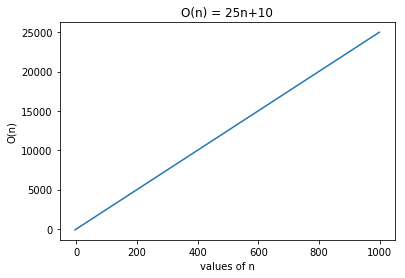

In [7]:
#https://matplotlib.org/users/pyplot_tutorial.html
import numpy as np
import matplotlib.pyplot as plt

#http://courses.csail.mit.edu/6.867/wiki/images/3/3f/Plot-python.pdf
n = np.arange(-5, 1000, 1)
On = (25*n + 10)
plt.plot(n, On) # Create line plot with yvals against xvals
plt.title('O(n) = 25n+10')
plt.ylabel('O(n)')
plt.xlabel('values of n')
plt.show()

 We can observe this directly using the following code: 

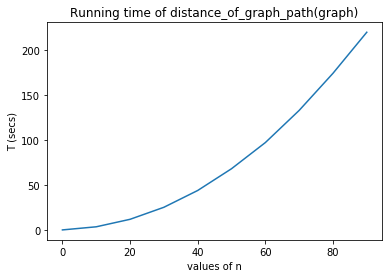

In [8]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import time
import matplotlib.pyplot as plt
df_cities = pd.read_csv('../input/cities.csv')
df_cities.head()

cities = df_cities.CityId

cities_path = list(df_cities.CityId[:])

def sieve_of_eratosthenes(n):
    primes = [True for i in range(n+1)] # Start assuming all numbers are primes
    primes[0] = False # 0 is not a prime
    primes[1] = False # 1 is not a prime
    for i in range(2,int(np.sqrt(n)) + 1):
        if primes[i]:
            k = 2
            while i*k <= n:
                primes[i*k] = False
                k += 1
    return(primes)

prime_cities = sieve_of_eratosthenes(max(df_cities.CityId))


def graph_structure(path):
    graph = {}
    index = 0
    for city in path:
        path = list(path)
        next_index = index + 1
        prev_index = index-1
        prev_city = path[prev_index]
        if index < len(path)-1:
            next_city = path[next_index]
        else:
            next_city = path[0]
        graph[city]= (prev_city, next_city)
        index = index+1
    return graph


def distance_of_graph_path(graph):
    cities = pd.read_csv("../input/cities.csv")
    dict_X= cities.X
    dict_Y = cities.Y
    distance = 0
    step_num = 1
    for city in graph:
        next_city = graph.get(city)[1]
        currentX,currentY = dict_X.get(city), dict_Y.get(city)
        nextX,nextY = dict_X.get(next_city),dict_Y.get(next_city)
        distance = distance + np.sqrt(pow((nextX - currentX),2) + pow((nextY - currentY),2)*\
                                      (1+ 0.1*((step_num % 10 == 0)*int(not(prime_cities[city])))))
        step_num = step_num + 1  
    return distance


increment = [ i for i in range(0, 100,10)]
times = []
for i in increment:
    start = time.time()
    percent_rows = int(len(df_cities)*(i/100))
    percent_data = df_cities.head(percent_rows)
    percent_path = list(percent_data.CityId[:].append(pd.Series([0])))
    graph=graph_structure(percent_path)
    distance_of_graph_path(graph)
    end = time.time()
    times.append(end-start)
    
    
n = increment
T = times
plt.plot(n, T) # Create line plot with yvals against xvals
plt.title('Running time of distance_of_graph_path(graph)')
plt.ylabel('T (secs)')
plt.xlabel('values of n')
plt.show()

It can be seen here however, that the running time of this algorithim would appear to be an exponential function and runs in \\(O(n) = n^2\\) which seems to go against the simplified functionality of the final Running Time equation derived. This can generally be explained with the personalised function graph_structure. In particular, the running time of that specific algorithm would also be considered to run on \\(O(n) = n\\) and when run within the same kind of function of distance_of_graph_path it nests the Running Time of \\(O(n) = 25n + 10 \\) within the other \\(O(n) = n) and as such that overall Running Time function can be considered to be:

$$O(n) = 25n^2 +10n $$ 
Which is what can be observed of this form of the equation. If the Graph Data Structure is pre-built before Running the distance_of_graph_path algorithm we observe that the Running Time is similar to the originally derived Running Time. This can be directly observed in the Code below. 

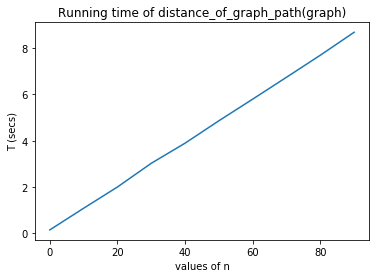

In [9]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import time
import matplotlib.pyplot as plt
df_cities = pd.read_csv('../input/cities.csv')
df_cities.head()

cities = df_cities.CityId

cities_path = list(df_cities.CityId[:])

def sieve_of_eratosthenes(n):
    primes = [True for i in range(n+1)] # Start assuming all numbers are primes
    primes[0] = False # 0 is not a prime
    primes[1] = False # 1 is not a prime
    for i in range(2,int(np.sqrt(n)) + 1):
        if primes[i]:
            k = 2
            while i*k <= n:
                primes[i*k] = False
                k += 1
    return(primes)

prime_cities = sieve_of_eratosthenes(max(df_cities.CityId))


def graph_structure(path):
    graph = {}
    index = 0
    for city in path:
        path = list(path)
        next_index = index + 1
        prev_index = index-1
        prev_city = path[prev_index]
        if index < len(path)-1:
            next_city = path[next_index]
        else:
            next_city = path[0]
        graph[city]= (prev_city, next_city)
        index = index+1
    return graph


def distance_of_graph_path(graph):
    cities = pd.read_csv("../input/cities.csv")
    dict_X= cities.X
    dict_Y = cities.Y
    distance = 0
    step_num = 1
    for city in graph:
        next_city = graph.get(city)[1]
        currentX,currentY = dict_X.get(city), dict_Y.get(city)
        nextX,nextY = dict_X.get(next_city),dict_Y.get(next_city)
        distance = distance + np.sqrt(pow((nextX - currentX),2) + pow((nextY - currentY),2)*\
                                      (1+ 0.1*((step_num % 10 == 0)*int(not(prime_cities[city])))))
        step_num = step_num + 1  
    return distance


increment = [ i for i in range(0, 100,10)]
graphs = []
times = []

for i in increment:
    percent_rows = int(len(df_cities)*(i/100))
    percent_data = df_cities.head(percent_rows)
    percent_path = list(percent_data.CityId[:].append(pd.Series([0])))
    graph=graph_structure(percent_path)
    graphs.append(graph)
    
for graph in graphs:
    start = time.time()
    distance_of_graph_path(graph)
    end = time.time()
    times.append(end-start)
    
    
n = increment
T = times
plt.plot(n, T) # Create line plot with yvals against xvals
plt.title('Running time of distance_of_graph_path(graph)')
plt.ylabel('T (secs)')
plt.xlabel('values of n')
plt.show()

The figure produced from the code above shows that the Running Time does run on \\(O(n) = n\\) time fundamentally and the original best-case-scenario derivation of the Running Time was correct. 

**Conclusion**

*Efficiency of Algorithim 1 and Algorithim 2*

The general efficiency of both of these algorithms is roughly the same, as both are fundamentally the same kind of algorithm. The difference between the algorithms is the Data Structures they utilize. It should be noted that most programming languages do not inherently support Data Structures like Search Trees and Graph ADT because they can be generally simulated and be utilised to greater effect with the data structures already utilised within Python and CPython. In particular the known data structures and containers of Python are as follows:

* list
* set
*  dict
* collection

With dict or set primarily being able to simulate a Graph AD. These allow for a greater utility between the two. In these algorithms the Abstract Data Type of Graph was simulated using a Dictionary, which is a further abstraction on the Data Type Hash Tables. This means that a Graph data type in this context roughly has the same kind of running times as the Dictionary but requires more input of data then a Dict data type. The Graph Data Type is simply a node with the nodes connected to it. For any calculations to be performed for these nodes, the data associated with the key node or vertex must have some relation to usable data. In this algorithms implementation of the Graph Data Structure, the values associated with the vertex are vertexes which point to specific values within a Dictionary that can be used for calculation purposes. There is a general function all Graph ADT's should have which is the .element() function which produces the values associated with the node. This is simulated with the .get() function of the Dict. With this in mind however, we observe that when using this in the graph form we get a faster call for the next node in the path than it would be if we were comparitively finding these using the normal dict values that would scan the entire dictionary as per the total_distance algorithm. However, analysing the specific Algorithms and their data types we can understand the efficiency of the algorithm. 




*Algorithm 1*

When analysing Algorithm 1, the efficiency of it seems to be fairly good. The Final Running Time for this algorithm was discovered to be: 

$$O(n) = 21n+10 $$

Showing that it runs on \\(O(n) = n\\) time. This is true in the best case scenario of the input data type (Dict), if the collisions of the indexes are handled correctly with no issues whatsover. If there is a collision however, it is unknown how the Dict Data Type within the Python structure actually probes for empty indexes, but we can generally assume that it is indexed using Open Adressing, wherein the value for the index is assigned to it linearly while each mapped index is empty. There are a number of different ways of Open Adressing a Hash Table and such as Linear Probing, Quadratic Probing or Double Hashing. Double Hashing takes the longest but is generally considered the safest as it has the potential for never colliding or producing a null index. This fundamentally means that the worst case scenario for any hash table with the potential for collisions will always have a Running Time of \\(O(n) = n\\).  This was why the initial Running Time function with worst Case Scenario analysis resulted in the Running Time function of :

$$O(n) = 4n^2 + 17n +10$$

Which meant if there were collisions or multiple values assigned to the same index/key, the algorithm would have to scan the entire dictionary to find the correct value. This means that as the dict becomes larger, the running time grows exponentially. However, the algorithm total_distance only ever takes in an ordered, single valued dict, no double assigned values for keys. There are presumably no collisions inherent within the input data type because it comes from a CSV file, which generally takes in ordered columns under certain values for certain keys. This is why the final algorithm running time was calculated to \\(O(n) = n\\) running time. However, in other circumstances, wherein collisions are a given within the input Data Type, there is an issue with the amount of time that the .get() function runs in the algorithm and the whole algorithm becomes less efficient. There are already safeguards to this, as the default dict data type for python already cannot take more than one value for a given key. Work arounds for this do exist, such as putting tuples into the given key, or even a list. This does mean though that there will never be more than one thing in the index of the dict hash table. 
The efficiency of this is quite exstensive, as the algorithm only ever has to run until it finds the specific key that the user is looking for. There will also never be a duplicate key so at worst the algorithm will only run through the entire length of the input data once if it needs something at the end of the dict. 

The efficiency of the algorithm itself is rather good, there is one for loop, which iterates over the length of the input list, while it only ever calls the dict 4 times in its running time for each loop. This would of course cause problems if collisions were involved but it is thankfully not the case. The rest of the algorithm is simply assignments and primitive operations that do not completely effect the running time of the algorithm in question. Since this algorithm in questions runs at best in the Linear \\(O(n) = n\\) time and at worse \\(O(n) = n^2\\) time we can generally say in both scenarios this algorithm runs quite efficiently. 

The inherent benefit of having the Dict data type used as the variable to scan is that it allows for the scanning of a list without having to neccessarily get a specific index for the list. A dict value has a confirmed value for its key index and there is a simple search algorithm built into its data type to find it. The general issue here is that the Data Type requires a search function at all. Although the fundamental function of indexing a list (as in : list[index]) has a similar running time. Irregardless, this algorithm works well and in consideration of the entire input data set of cities.csv it works well in calculating the overall distance a path passed to it would travel. 

*Algorithm 2*

The final Running Time calculated for the algorithm distance_of_graph_path is as follows:

$$O(n) = 25n+10 $$ 

However, this running time was calculated when ommiting the nature of the internal abstracted data type of the Dict. The Graph Data type, as mentioned in the analysis component of this specific algorithm, does not neccesarily exist in the Python IDE, and as such, a facsimile of this data Type is required to effectively recreate the idea. This is in essence what the algorithm graph_structure does, it passes through the DataFrame Data type and recreates the indexes put into it into a single Graph pathway that follows from the start node to the end node. This is of course not neccesarily how a Graph would be structured, there are often multiple nodes connected to one another in a Graph structure, but for the sake of simplicity for this algorithm it simple processes the path passed to it as a series of interconnected nodes, connected in order. This does work for an approximation of how a Graph ADT would operate within the Python code. The algorithms running time when considered in conjunction with the running time of the algorithm which creates the data structure required for it is as follows:

$$O(n) = 25n^2+10n $$ 

This is due to the fact that the running time for the graph_structure algorithm can be considered to also be in \\(O(n) = n\\) time and therefore would be nested within the running time of distance_of_graph_path. The issue inherent here is that the Graph Data Type as simulated here relies on the Running Time of the Dict data type. Since the Graph Data type is essential an abstracted form of the Dict type, which is in itself an abstracted form of the Hash Table type, the running times are extremely similar. This is also something inherent with how the Graph Data Type is constructed. The Graph Data type, regardless of its level of abstraction, has a number of methods that are assumed to exist within it. One such function would be the function called .element() which essential gets the designated values of the key node that is being called and then returns that value back to the variable it is asssigned. This is essentially the same as the .get() method of a dict and generally has the same potential worst case running time of \\(O(n) = n\\). Meaning these two Data Structures are fundamentally the same, which is also why there aren't many IDE's that directly use this data structure, it is inherently limited due to the lack of methods that would fundamentally aid in using it, and its utility is limited to simulations or calculations of real world scenarios like the one utilised here in this algorithm. 

From an efficiency standpoint, the two algorithms are fundamentally the same, but call their respective Data Structures in different ways. This algorithm takes in the two nodes, the current node and the next node in the path, to calculate the distance between them and add them up to get the final distance. This is somewhat different to the total_distance algorithm, which simply takes in both the information required for the distance calculation and also a list of integers which represent the cities in the list. The actual utility of the Graph structure is that it already has the order of the path and simply requires manipulation from the algorithm to get the required data for calculation. Though they are fundamentally the same thing, only one thing needs to be passed to the distance_of_graph_path algorithm, a dictionary of nodes and their connected nodes. There is a slight increase in efficiency with having one input, as it means that it only relies on the input data. The issue being that calling the input data directly only results in the node numbers required, whereas the actual calculations are performed using the Dict.get() methods. There are alternative ways of utilising the Graph such that it can be more useful however, wherein the distance between nodes can be used as the edges of the vertex rather than the connection to the nodes being the edge of the vertex. This would fundamentally make the running speed much faster for this exact algorithm. However, that is not neccasrily what this algorithm was design for, it is designed to take a series of nodes and apply them to the information associated with them, to get the length of the path involved with them. 

Ultimately though, when considered over the entire data set of cities.csv, the Running time does seem to be a lot more in comparison to the  total_distance algorithm. This is due to the calculation and reconstruction of the input data type to the simulated Graph Data type. However, they both produce a similar result. 

The conclusion that can generally be made here is that given specific circumstances, the Graph data type is quite useful for the problem presented in the parent kernel of traveling-santa-problem-2018. However, when considered in the context of the actual input data and its respective type, the Dict or moreover the Hash Map Data Structure is the most useful and efficient type there is. This is also why the Data Structure Graph is not inherently installed in the Python IDE as Dict's are, because they are circumstantially useful, whereas the utility of a Hash Table and its related search algorithm can be universally useful across multiple algorithms and programs. 